In [ ]:
# import tweepy
import tweepy as tw

# your Twitter API key and API secret
my_api_key = "f0iXIYsNGK4wEdiXX4BlOuoas"
my_api_secret = "Xj4lJl3Po0giVkcSdLLIdVhP20y2STJcwBOX3TKljmicsq7lXg"

# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

search_query = "#WarInUkraine -filter:retweets"

# get tweets from the API
tweets = tw.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2022-02-01").items(10000)

# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

import pandas as pd

# intialize the dataframe
tweets_df = pd.DataFrame()

# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

# show the dataframe
tweets_df.head()

In [ ]:
import pandas as pd


In [ ]:
tweets_df = pd.read_csv('/content/drive/MyDrive/Final/WarInUkraine_Final - WarInUkraine.csv')

In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32465 entries, 0 to 32464
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_name      32463 non-null  object
 1   user_location  21426 non-null  object
 2   description    29309 non-null  object
 3   user_verified  32465 non-null  bool  
 4   date           32465 non-null  object
 5   text           32465 non-null  object
 6   hashtags       23347 non-null  object
 7   source         32465 non-null  object
dtypes: bool(1), object(7)
memory usage: 1.8+ MB


In [ ]:
tweets_df

,user_name,user_location,description,user_verified,date,text,hashtags,source
0,Ukrainian Media_Truth about war in Ukraine,Україна,"Only truth, objectivity and breaking news from...",False,2022-05-07 05:18:34,Timothy Snyder on Tyranny and on Ukraine \n h...,['WARINUKRAINE'],Twitter Web App
1,Kateryna Bilyk,Украина,"Miss Princess Ukraine 2020, Miss Supermodel Gl...",False,2022-05-07 05:11:38,Could Ukrainian who stole humanitarian help st...,NaN,Twitter for iPhone
2,kakavrizo,NaN,Κακαβρίζω ελεύθερα...,False,2022-05-07 05:06:49,NAZI = a member of a group advocating totalita...,NaN,Twitter Web App
3,Имя не может быть пустям,NaN,Стоит коммунисту нахмуриться – он становится ф...,False,2022-05-07 05:00:41,Thanks to the #Putin I'm waking up because of ...,"['Putin', 'Putin']",Twitter for Android
4,Natalia,Kyiv 🇺🇦,Я не русофоб. Я їх не боюся. Я їх ненавиджу. Ц...,False,2022-05-07 04:38:38,#russists destroyed the National Museum of Gri...,"['russists', 'Skovorodynivka', 'Kharkiv']",Twitter for iPhone
...,...,...,...,...,...,...,...,...
32460,where am i,"Phoenix, AZ",what's the point 😔✊,False,2022-05-03 17:04:39,What’s up peeps #freehop #JOHNNYXMETGALA #Ukra...,"['freehop', 'JOHNNYXMETGALA', 'UkraineWar']",Twitter for iPhone
32461,1 of the people,NaN,🌍,False,2022-05-03 17:02:28,"On May 9, the Russians will arrange a nuclear ...","['Russia', 'Ukraine', 'UkraineWar']",Twitter for Android
32462,realJimJones,Jonestown,"American cult leader, political activist, prea...",False,2022-05-03 17:00:51,@RaytheonTech RIM-7 Sea Sparrow missiles have ...,NaN,Twitter for iPhone
32463,Henrik Stroemblad,NaN,I'm one of the Utvandrare Wilhelm Moberg was a...,False,2022-05-03 17:00:50,Ukraine is now getting Iron Dome from Israel b...,NaN,Twitter for Android


In [ ]:
tweets_df['user_location'].value_counts()

Ukraine                              1697
Lost in the Minnesota North Woods     615
India                                 444
United States                         437
In your head.                         434
                                     ... 
Tehran                                  1
Northwest Indiana/Chicago               1
Imperial City, Cyrodiil                 1
The Holy Land                           1
Emsland, Niedersachsen                  1
Name: user_location, Length: 3859, dtype: int64

In [ ]:

from textblob import TextBlob
from pandas.io.json import json_normalize
from wordcloud import WordCloud
import math
import re
import json
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [ ]:
hashtags = hashtag_extract(tweets_df["text"])
hashtags = sum(hashtags, [])

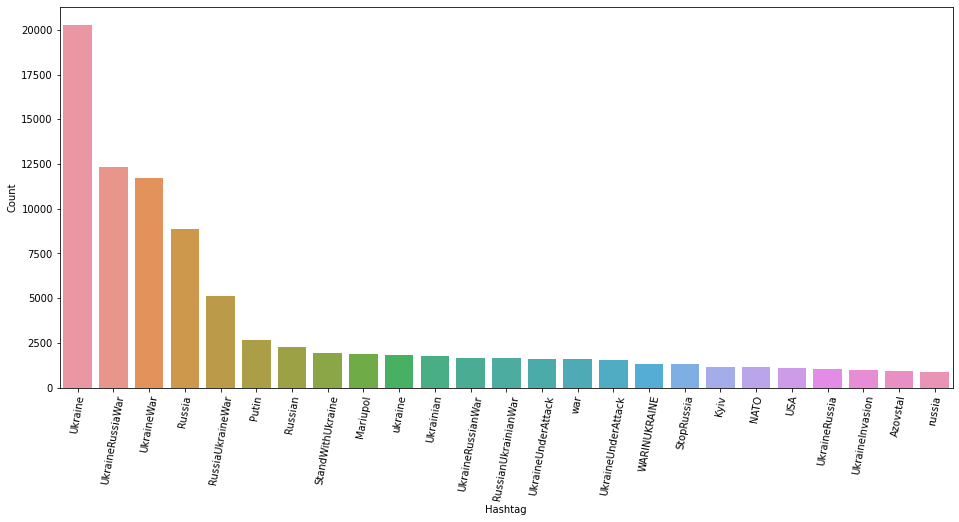

In [ ]:
generate_hashtag_freqdist(hashtags)

In [ ]:
# Preprocessing functions
"""
Removing ‘@names’,links (http | https),Punctuations, Numbers and Special characters. Because they don't convey any sentiment of the text

"""

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Basic function to clean the text
def clean_tweet(text):
    text = str(text)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove identifications
    text = re.sub(r'@\w+', '', text)
    # Remove links
    text = re.sub(r'http.?://[^/s]+[/s]?', '', text)
    return text.strip().lower()

    
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity <= 0:
        return 0


In [ ]:
tweets_df['Sentiment'] = tweets_df['text'].apply(lambda x:analyze_sentiment(x))
tweets_df['Length'] = tweets_df['text'].apply(len)
tweets_df['Word_counts'] = tweets_df['text'].apply(lambda x:len(str(x).split()))

In [ ]:
tweets_df.head()

,user_name,user_location,description,user_verified,date,text,hashtags,source,Sentiment,Length,Word_counts
0,Ukrainian Media_Truth about war in Ukraine,Україна,"Only truth, objectivity and breaking news from...",False,2022-05-07 05:18:34,Timothy Snyder on Tyranny and on Ukraine \n h...,['WARINUKRAINE'],Twitter Web App,0,82,9
1,Kateryna Bilyk,Украина,"Miss Princess Ukraine 2020, Miss Supermodel Gl...",False,2022-05-07 05:11:38,Could Ukrainian who stole humanitarian help st...,NaN,Twitter for iPhone,0,192,29
2,kakavrizo,NaN,Κακαβρίζω ελεύθερα...,False,2022-05-07 05:06:49,NAZI = a member of a group advocating totalita...,NaN,Twitter Web App,0,231,28
3,Имя не может быть пустям,NaN,Стоит коммунисту нахмуриться – он становится ф...,False,2022-05-07 05:00:41,Thanks to the #Putin I'm waking up because of ...,"['Putin', 'Putin']",Twitter for Android,1,193,27
4,Natalia,Kyiv 🇺🇦,Я не русофоб. Я їх не боюся. Я їх ненавиджу. Ц...,False,2022-05-07 04:38:38,#russists destroyed the National Museum of Gri...,"['russists', 'Skovorodynivka', 'Kharkiv']",Twitter for iPhone,0,295,35


In [ ]:
df = tweets_df[['user_location','description', 'Sentiment', 'user_verified', 'Length','Word_counts','text','hashtags']]
df.head()

,user_location,description,Sentiment,user_verified,Length,Word_counts,text,hashtags
0,Україна,"Only truth, objectivity and breaking news from...",0,False,82,9,Timothy Snyder on Tyranny and on Ukraine \n h...,['WARINUKRAINE']
1,Украина,"Miss Princess Ukraine 2020, Miss Supermodel Gl...",0,False,192,29,Could Ukrainian who stole humanitarian help st...,NaN
2,NaN,Κακαβρίζω ελεύθερα...,0,False,231,28,NAZI = a member of a group advocating totalita...,NaN
3,NaN,Стоит коммунисту нахмуриться – он становится ф...,1,False,193,27,Thanks to the #Putin I'm waking up because of ...,"['Putin', 'Putin']"
4,Kyiv 🇺🇦,Я не русофоб. Я їх не боюся. Я їх ненавиджу. Ц...,0,False,295,35,#russists destroyed the National Museum of Gri...,"['russists', 'Skovorodynivka', 'Kharkiv']"


In [ ]:
df['Clean tweet'] = df['text'].apply(lambda x:clean_tweet(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,user_location,description,Sentiment,user_verified,Length,Word_counts,text,hashtags,Clean tweet
0,Україна,"Only truth, objectivity and breaking news from...",0,False,82,9,Timothy Snyder on Tyranny and on Ukraine \n h...,['WARINUKRAINE'],timothy snyder on tyranny and on ukraine \n 7...
1,Украина,"Miss Princess Ukraine 2020, Miss Supermodel Gl...",0,False,192,29,Could Ukrainian who stole humanitarian help st...,NaN,could ukrainian who stole humanitarian help st...
2,NaN,Κακαβρίζω ελεύθερα...,0,False,231,28,NAZI = a member of a group advocating totalita...,NaN,nazi = a member of a group advocating totalita...
3,NaN,Стоит коммунисту нахмуриться – он становится ф...,1,False,193,27,Thanks to the #Putin I'm waking up because of ...,"['Putin', 'Putin']",thanks to the #putin i'm waking up because of ...
4,Kyiv 🇺🇦,Я не русофоб. Я їх не боюся. Я їх ненавиджу. Ц...,0,False,295,35,#russists destroyed the National Museum of Gri...,"['russists', 'Skovorodynivka', 'Kharkiv']",#russists destroyed the national museum of gri...


'''df[["Clean tweet","Sentiment"]].iloc[1000]
neutral = df[df['Sentiment'] == 0]
positive = df[df['Sentiment'] == 1]
negative = df[df['Sentiment'] == -1]
y
x = ['Neutral', 'Positive', 'Negative']
y = [len(neutral),  len(positive), len(negative)]

import plotly.graph_objs as go
# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y)])

# Customize aspect
#marker_color='rgb(158,202,225)'
fig.update_traces(marker_line_color='midnightblue',
                  marker_line_width=1.)
fig.update_layout(title_text='Distribution of sentiment')
fig.show()
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['Sentiment'].value_counts()]
labels = list(df['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = {})'.format(len(df)), fontsize = 16, pad = 20)
plt.show()
negative.iloc[1]
#neutral_text
print("Neutral tweet example  :",neutral['text'].values[15])
# Positive tweet
print("Positive Tweet example :",positive['text'].values[37])
#negative_text
print("Negative Tweet example :",negative['text'].values[1])
plotly.offline.init_notebook_mode(connected=True)
x = df.Length.values


fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5)])

fig.update_layout(title_text='Distribution of tweet lengths')
fig.show()


x1 = neutral.Length.values
x2 = positive.Length.values
x3 = negative.Length.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5,
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5,
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()


y1 = neutral.Length.values
y2 = positive.Length.values
y3 = negative.Length.values

fig = go.Figure()

fig.add_trace(go.Box(y=y1, 
                     name="Neutral", 
                     marker_line_width=1, 
                     marker_line_color="midnightblue"))

fig.add_trace(go.Box(y=y2, 
                     name="Positive", 
                     marker_line_width=1, 
                     marker_color = 'rgb(50,202,50)'))

fig.add_trace(go.Box(y=y3, 
                     name="Negative", 
                     marker_line_width=1, 
                     marker_color = 'crimson'))

fig.update_layout(title_text="Box Plot tweet lengths")

fig.show()
df.head()'''

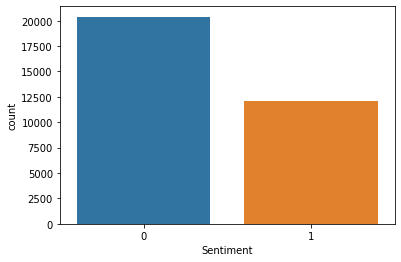

In [ ]:
import seaborn as sns
sns.countplot(x='Sentiment', data=df)


In [ ]:
from sklearn import model_selection


In [ ]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(df['Clean tweet'], 
                                     df['Sentiment'], test_size=0.30)

In [ ]:
import numpy as np
X_train=np.array(X_train.values.tolist())
X_test=np.array(X_test.values.tolist())
y_train=np.array(y_train.values.tolist())
y_test=np.array(y_test.values.tolist())

In [ ]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)

48440


In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
maxlen = 100
X_train_pad = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from tensorflow.keras.layers import Flatten, GRU, Dense, Flatten, Embedding
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = Sequential()
'''
model = Sequential()
model.add(Dense(6, input_dim=100, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
'''
model = keras.Sequential()
model.add(layers.Dense(7,input_dim = 100 , activation="relu"))
model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(5))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 7)                 707       
                                                                 
 dense_34 (Dense)            (None, 6)                 48        
                                                                 
 dense_35 (Dense)            (None, 5)                 35        
                                                                 
Total params: 790
Trainable params: 790
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train_pad, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test_pad, y_test))

Epoch 1/10
178/178 [==============================] - 3s 13ms/step - loss: 6.6674 - acc: 0.3276 - val_loss: 6.5455 - val_acc: 0.3226
Epoch 2/10
178/178 [==============================] - 1s 5ms/step - loss: 6.5709 - acc: 0.3370 - val_loss: 6.5551 - val_acc: 0.3401
Epoch 3/10
178/178 [==============================] - 1s 6ms/step - loss: 6.5406 - acc: 0.3419 - val_loss: 6.5030 - val_acc: 0.3172
Epoch 4/10
178/178 [==============================] - 1s 6ms/step - loss: 6.4977 - acc: 0.3485 - val_loss: 6.4502 - val_acc: 0.3595
Epoch 5/10
178/178 [==============================] - 1s 6ms/step - loss: 6.4824 - acc: 0.3476 - val_loss: 6.4449 - val_acc: 0.3376
Epoch 6/10
178/178 [==============================] - 1s 6ms/step - loss: 6.4733 - acc: 0.3343 - val_loss: 6.5052 - val_acc: 0.3170
Epoch 7/10
178/178 [==============================] - 1s 5ms/step - loss: 6.4928 - acc: 0.3265 - val_loss: 6.5216 - val_acc: 0.3234
Epoch 8/10
178/178 [==============================] - 1s 6ms/step - loss: 6

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model

<function keras.utils.vis_utils.plot_model>

In [ ]:
pip install transformers

In [ ]:
import torch
from transformers import AutoTokenizer , AutoModelForSequenceClassification

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
df['sentiment_score'] = df['Clean tweet'].apply(lambda x: sentiment_score(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.to_csv("/content/drive/MyDrive/Final/final_senti.csv")
df.head()

,user_location,description,Sentiment,user_verified,Length,Word_counts,text,hashtags,Clean tweet,sentiment_score
0,Україна,"Only truth, objectivity and breaking news from...",0,False,82,9,Timothy Snyder on Tyranny and on Ukraine \n h...,['WARINUKRAINE'],timothy snyder on tyranny and on ukraine \n 7...,1
1,Украина,"Miss Princess Ukraine 2020, Miss Supermodel Gl...",0,False,192,29,Could Ukrainian who stole humanitarian help st...,NaN,could ukrainian who stole humanitarian help st...,1
2,NaN,Κακαβρίζω ελεύθερα...,0,False,231,28,NAZI = a member of a group advocating totalita...,NaN,nazi = a member of a group advocating totalita...,1
3,NaN,Стоит коммунисту нахмуриться – он становится ф...,1,False,193,27,Thanks to the #Putin I'm waking up because of ...,"['Putin', 'Putin']",thanks to the #putin i'm waking up because of ...,5
4,Kyiv 🇺🇦,Я не русофоб. Я їх не боюся. Я їх ненавиджу. Ц...,0,False,295,35,#russists destroyed the National Museum of Gri...,"['russists', 'Skovorodynivka', 'Kharkiv']",#russists destroyed the national museum of gri...,1
